# Modelling
The main goal of this notebook is to start wrintg the requiered steps/functions, requiered for the preprocessing of the data. In additioon, we use do a preliminary modelling usiing [LazyPredict](https://github.com/shankarpandala/lazypredict/)

We will attempt two approaches:
* Imputing the raw data with the columns median ( recall that most distributions are skewed ) and Run LazyPredict
* Imputing the processed data ( long format ) with column meadian or time series interpolation and run LazyPredict

# Modelling
The main goal of this notebook is to start wrintg the requiered steps/functions, requiered for the preprocessing of the data. In additioon, we use do a preliminary modelling usiing [LazyPredict](https://github.com/shankarpandala/lazypredict/)

We will attempt two approaches:
* Imputing the raw data with the columns median ( recall that most distributions are skewed ) and Run LazyPredict
* Imputing the processed data ( long format ) with column meadian or time series interpolation and run LazyPredict

### Usage of LazyPredict
* We are using lazyPredict nightly in the project.
* LazyPredict (LP) is a type of AutoML tool, that allows you to test multiple extimators( Classifiers or Regressors ) from sci-kit learn. Under the hood, LP defines a list of models to test. In the case of Regression, two of the models were talking a relly loong time and even crashed the jupyter kernels. To circumvent that, modifiedd slightly the list of regressors to test.
* To conveniently instantiate a `LazyRegressor()`, you can import `get_lazy_regressor()` from `LazyPredict.py` in the helpers folder


In [2]:
# import libraries
from helpers.LazyPredict import get_lazy_regressor
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Hide all warnings
import warnings
warnings.filterwarnings("ignore")

### Approach 1: Imputing the RawData + LazyPRedict

In [2]:
# Read the raw data
train = pd.read_csv( '../data/raw/train.csv' , index_col = 0 )
train.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.60,NaN,NaN,9.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.40
p01_1,p01,06:25:00,NaN,NaN,9.70,NaN,NaN,9.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80
p01_2,p01,06:40:00,NaN,NaN,9.20,NaN,NaN,8.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.50
p01_3,p01,06:55:00,NaN,NaN,8.70,NaN,NaN,8.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.80
p01_4,p01,07:10:00,NaN,NaN,8.40,NaN,NaN,8.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.70


At the beginning, we will remove the columns related to carbs and activity, as they have very large ammount of NAs

In [3]:
cond = (train.columns.str.startswith('activity-')) | (train.columns.str.startswith('carbs-'))
exclude_cols = train.columns[np.where(cond)[0]]

# Also exclude the 'id','p_num' & 'time'
train_s = train.drop(exclude_cols, axis=1).drop(['p_num', 'time'], axis=1)
train_s

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,NaN,NaN,9.60,NaN,NaN,9.70,NaN,NaN,9.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.40
p01_1,NaN,NaN,9.70,NaN,NaN,9.20,NaN,NaN,8.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80
p01_2,NaN,NaN,9.20,NaN,NaN,8.70,NaN,NaN,8.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.50
p01_3,NaN,NaN,8.70,NaN,NaN,8.40,NaN,NaN,8.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.80
p01_4,NaN,NaN,8.40,NaN,NaN,8.10,NaN,NaN,8.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_25294,8.80,9.10,9.20,9.40,9.80,10.20,10.40,10.30,10.10,10.00,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,11.10
p12_25295,9.10,9.20,9.40,9.80,10.20,10.40,10.30,10.10,10.00,9.80,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,10.90
p12_25296,9.20,9.40,9.80,10.20,10.40,10.30,10.10,10.00,9.80,9.50,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,10.70


Next, we create a train/test split. Then, impute the Train and test set with the medians of the train set

In [4]:
X = train_s.drop('bg+1:00', axis=1)
y = train_s['bg+1:00']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Impute the columns of X_train and X_test
medians = X_train.median(axis=0)
X_train = X_train.fillna(medians)
X_test = X_test.fillna(medians)

Run a LazyPredict regressor. This will test 39 regression models from sklearn, using default parameters

In [5]:
reg = get_lazy_regressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 38/39 [1:14:57<04:20, 260.81s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88001
[LightGBM] [Info] Number of data points in the train set: 123916, number of used features: 360
[LightGBM] [Info] Start training from score 8.277824


100%|██████████| 39/39 [1:15:05<00:00, 115.53s/it]


In [6]:
dir_path = "../models/LP_res"
os.makedirs( dir_path , exist_ok = True )
models.to_csv( os.path.join( dir_path , '01_raw_data_LazyPredict.csv' ) )
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.69,0.69,1.67,752.18
BaggingRegressor,0.63,0.63,1.81,207.77
XGBRegressor,0.62,0.62,1.85,5.02
LGBMRegressor,0.59,0.60,1.90,7.59
HistGradientBoostingRegressor,0.59,0.59,1.91,7.85
GradientBoostingRegressor,0.55,0.55,2.01,355.20
LassoLarsCV,0.51,0.51,2.09,3.61
LassoCV,0.51,0.51,2.09,10.73
LassoLarsIC,0.51,0.51,2.09,2.43


### Approach 2: Imputing the Proccessed data ( long format ) + LazyPRedict

In [1]:
# Read the processed data
train2 = pd.read_csv('../data/interim/all_train.csv')

#Separate columns of interest
coi = ['bg', 'insulin', 'hr', 'steps', 'cals', 'bg+1:00']
data = train2[coi]

# Because of the way the long format data is generated, some NAs are introduced in thsi columns
# For this approach, we will remove those
data = data.dropna(subset='bg+1:00')
data

NameError: name 'pd' is not defined

In [8]:
# Do a train/Test split and impute columns with the medians of the Train set
X = data.drop('bg+1:00', axis=1)
y = data['bg+1:00']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

medians = X_train.median(axis=0)
X_train = X_train.fillna(medians)
X_test = X_test.fillna(medians)

In [9]:
# Run a LazyPRedict Regressor
reg = get_lazy_regressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 38/39 [10:01<00:35, 35.84s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 123916, number of used features: 5
[LightGBM] [Info] Start training from score 8.277824


100%|██████████| 39/39 [10:02<00:00, 15.44s/it]


In [10]:
dir_path = "../models/LP_res"
os.makedirs( dir_path , exist_ok = True )
models.to_csv( os.path.join( dir_path , '02_LongFormat_data_MedianImp_LazyPredict_res.csv' ) )
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.53,0.53,2.05,0.25
LGBMRegressor,0.53,0.53,2.06,0.36
HistGradientBoostingRegressor,0.53,0.53,2.06,0.65
GradientBoostingRegressor,0.51,0.51,2.09,5.44
MLPRegressor,0.50,0.50,2.11,17.40
SVR,0.49,0.49,2.13,358.67
RidgeCV,0.48,0.48,2.16,0.02
BayesianRidge,0.48,0.48,2.16,0.02
Ridge,0.48,0.48,2.16,0.01


### Approach 3: Imputing the Proccessed data ( long format ) by time series interpolation + LazyPRedict

In [30]:
# Read the processed data
train2 = pd.read_csv('../data/interim/all_train.csv')
train2['Unnamed: 0'] = pd.DataFrame( train2['Unnamed: 0'] )

#Separate columns of interest
coi = ['bg', 'insulin', 'hr', 'steps', 'cals', 'bg+1:00']
data = train2

# Because of the way the long format data is generated, some NAs are introduced in thsi columns
# For this approach, we will remove those
data = data.dropna(subset='bg+1:00')

# Use linear interpolation to impute NAs.
# USe backward- and forward- fill to account for boundaries, where no  imputation is possible
for col in ['bg', 'insulin', 'hr', 'steps', 'cals']:
    data[col] = data[col].interpolate(method='linear').bfill().ffill()

data

,Unnamed: 0,p_num,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00,initial_resolution
71,2020-01-01 06:10:00,p01,15.10,0.04,NaN,99.60,0.00,4.80,NaN,13.40,15min
74,2020-01-01 06:25:00,p01,14.40,0.04,NaN,99.60,0.00,4.80,NaN,12.80,15min
77,2020-01-01 06:40:00,p01,13.90,0.04,NaN,99.60,0.00,4.80,NaN,15.50,15min
80,2020-01-01 06:55:00,p01,13.80,0.04,NaN,99.60,0.00,4.80,NaN,14.80,15min
83,2020-01-01 07:10:00,p01,13.40,0.04,NaN,99.60,0.00,4.80,NaN,12.70,15min
...,...,...,...,...,...,...,...,...,...,...,...
235122,2020-04-01 23:35:00,p12,9.80,0.28,NaN,104.40,8.00,6.75,NaN,11.10,5min
235123,2020-04-01 23:40:00,p12,10.30,1.06,NaN,104.40,8.00,6.75,NaN,10.90,5min
235124,2020-04-01 23:45:00,p12,10.70,0.56,NaN,104.40,8.00,6.75,NaN,10.70,5min
235125,2020-04-01 23:50:00,p12,11.00,0.05,NaN,104.40,8.00,6.75,NaN,10.50,5min


In [33]:
data.iloc[:288,:]['bg+1:00'].diff()

71       NaN
74     -0.60
77      2.70
80     -0.70
83     -2.10
        ... 
991     1.30
994     1.40
997     1.20
1000   -0.10
1004    0.00
Name: bg+1:00, Length: 288, dtype: float64

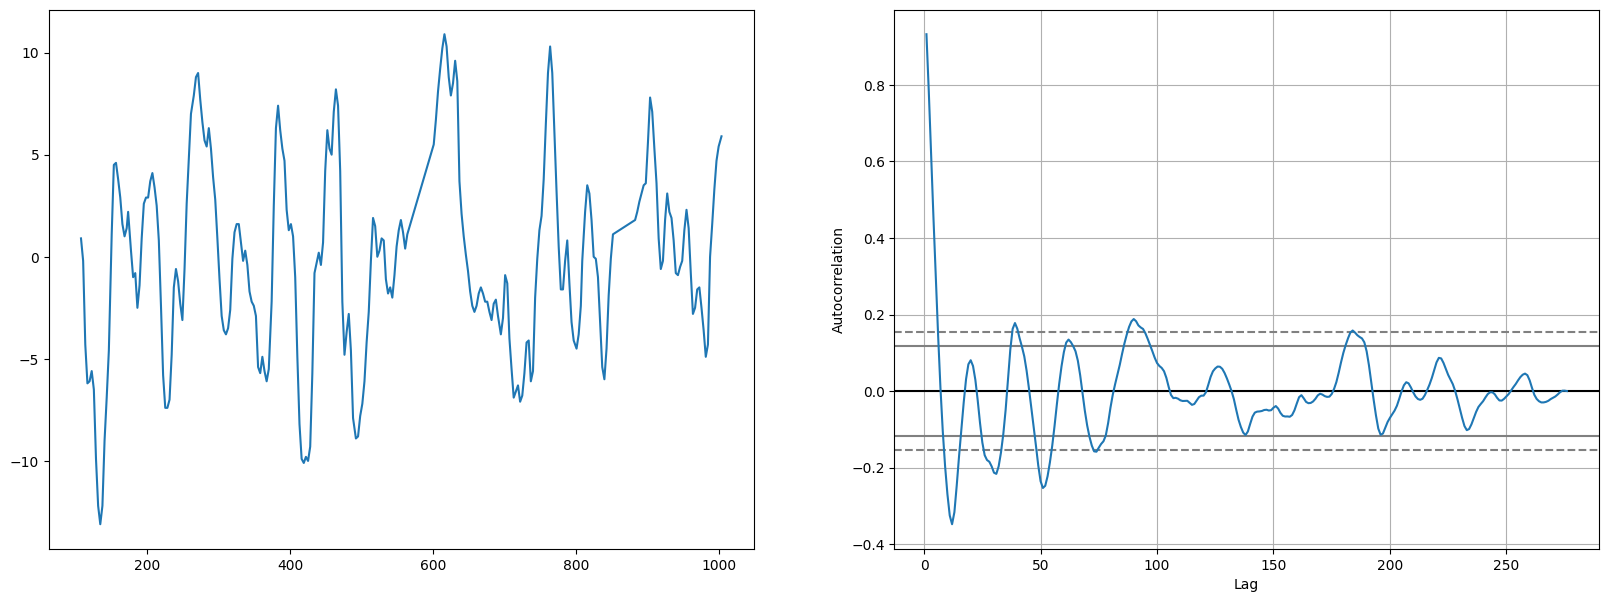

In [35]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7)) # Creating figure and axes

airpasslog_1 = data.iloc[:288,:]['bg+1:00'].diff( periods=12 ).dropna() # 1st order differencing

airpasslog_1.plot(ax = ax1) #Differenced time series

pd.plotting.autocorrelation_plot(airpasslog_1, ax = ax2); #Autocorrelogram


In [36]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


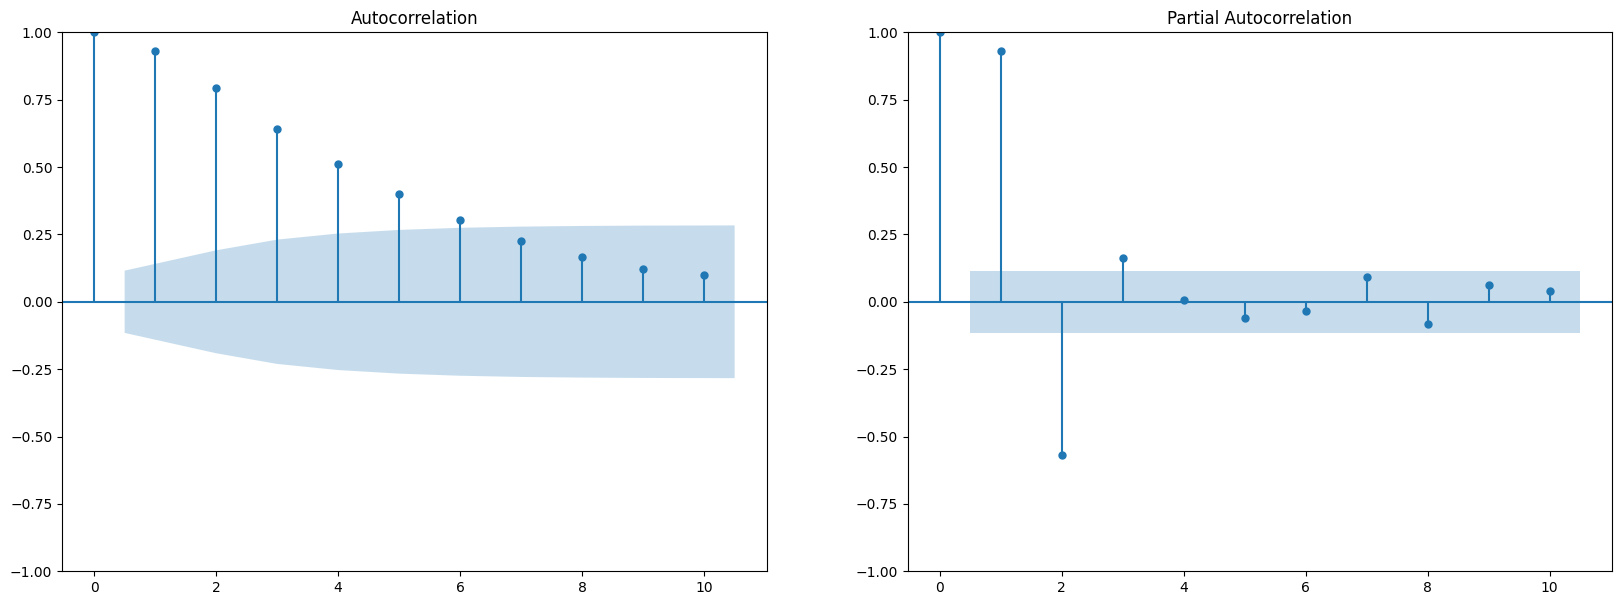

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

test_series = data.iloc[:288,:]['bg+1:00']
plot_acf(test_series, lags = 10, ax=ax1)
plot_pacf(test_series, lags = 10, ax=ax2)
plt.show()

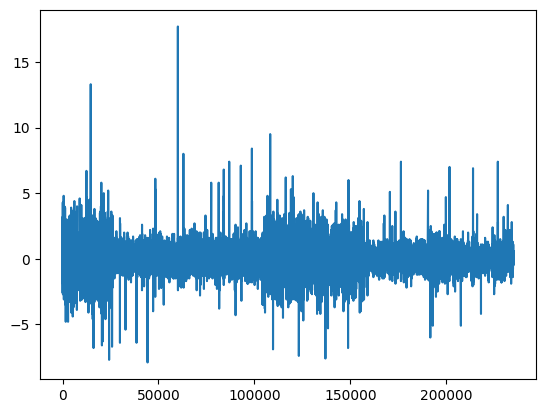

In [11]:
import matplotlib.pyplot as plt 
plt.plot( data['bg+1:00'].diff() )
plt.show()

In [12]:
data['bg+1:00'].diff() 

71         NaN
74       -0.60
77        2.70
80       -0.70
83       -2.10
          ... 
235122   -0.20
235123   -0.20
235124   -0.20
235125   -0.20
235126   -0.30
Name: bg+1:00, Length: 177024, dtype: float64